In [2]:
#Sentiment Analysis on Large Movie Review Dataset using NLP

#Importing the required libraries 
import numpy as np
import pandas as pd
import os
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


In [3]:
#The reviews dataset had train and test datasets, each with 25k reviews including positive and negative reviews.
#The reviews were present as multiple text files which have been merged into full_train.txt and full_test.txt using the shell commands as mentioned in the word document.
#Loading the datasets
reviews_train = []
for line in open('/Users/navyasogi/Desktop/ML_Coursework/ProjectSubmission_2_Group10/movie_data/full_train.txt', 'r'):
    
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('/Users/navyasogi/Desktop/ML_Coursework/ProjectSubmission_2_Group10/movie_data/full_test.txt', 'r'):
    
    reviews_test.append(line.strip())
    
target = [1 if i < 12500 else 0 for i in range(25000)]


In [4]:
#Data cleaning: Removing punctuation and HTML tags and making everything to lower-case for easy processing 
#We are using regular expressions/pattern matching approach

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "
reviews = []
def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)
reviews_train_clean[:1]


["bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my  years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled  at  high a classic line inspector i'm here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn't"]

In [5]:
#Data Preparation
#Text Preprocessing
#1.Removing Stop words
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = ['in','of','at','a','the']
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(reviews_train_clean)



In [6]:
#2.Normalization 
#Stemming 
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews = get_stemmed_text(reviews_train_clean)
stemmed_reviews[:1]

["bromwel high is a cartoon comedi it ran at the same time as some other program about school life such as teacher my year in the teach profess lead me to believ that bromwel high' satir is much closer to realiti than is teacher the scrambl to surviv financi the insight student who can see right through their pathet teachers' pomp the petti of the whole situat all remind me of the school i knew and their student when i saw the episod in which a student repeatedli tri to burn down the school i immedi recal at high a classic line inspector i'm here to sack one of your teacher student welcom to bromwel high i expect that mani adult of my age think that bromwel high is far fetch what a piti that it isn't"]

In [7]:
# Lemmatization 
nltk.download('wordnet')
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews = get_lemmatized_text(reviews_train_clean)
lemmatized_reviews[:1]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/navyasogi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


["bromwell high is a cartoon comedy it ran at the same time a some other program about school life such a teacher my year in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teacher the scramble to survive financially the insightful student who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the school i knew and their student when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line inspector i'm here to sack one of your teacher student welcome to bromwell high i expect that many adult of my age think that bromwell high is far fetched what a pity that it isn't"]

# Bag of Words

In [55]:
# Bag of words 
# Initialize a bag of words  
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 500) 

# Fit transform the data
X = vectorizer.fit_transform(reviews_train_clean).toarray()
X_val = vectorizer.transform(reviews_test_clean).toarray()

In [9]:
# Take a look at the vocabulary
vocab = vectorizer.get_feature_names()
vocab

['able',
 'about',
 'absolutely',
 'act',
 'acting',
 'action',
 'actor',
 'actors',
 'actress',
 'actually',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'american',
 'an',
 'and',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'around',
 'art',
 'as',
 'at',
 'audience',
 'away',
 'awful',
 'back',
 'bad',
 'based',
 'be',
 'beautiful',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'beginning',
 'behind',
 'being',
 'believe',
 'best',
 'better',
 'between',
 'big',
 'bit',
 'black',
 'book',
 'boring',
 'both',
 'boy',
 'budget',
 'but',
 'by',
 'called',
 'came',
 'camera',
 'can',
 'car',
 'care',
 'case',
 'cast',
 'certainly',
 'character',
 'characters',
 'child',
 'children',
 'cinema',
 'classic',
 'close',
 'come',
 'comedy',
 'comes',
 'completely',
 'could',
 'couldn',
 'couple',
 'course',
 'dark',
 'day',
 'days',
 'dead',
 'death',
 'definitely',
 'despite',
 'dialogue',
 'd

In [56]:
# Split data to test preprocessing and modeling techniques
X_train, X_test, y_train, y_val = train_test_split(X, target,train_size=0.75)
#Random forest classifier
    
final_rf = RandomForestClassifier(n_estimators = 10)
final_rf.fit(X, target)
x = accuracy_score(target, final_rf.predict(X_val))
x1 = f1_score(target, final_rf.predict(X_val),average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_rf.predict(X_val)))
print ('F1 score:', f1_score(target, final_rf.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_rf.predict(X_val)))


Final Accuracy: 0.74364
F1 score: 0.7426925780162728

 Confusion Matrix:
 [[10054  2446]
 [ 3963  8537]]


In [58]:
#Logistic Regression
#X_train, X_test, y_train, y_val = train_test_split(
    #X, target, train_size = 0.75
#)

final_log = LogisticRegression()
final_log.fit(X, target)
y = accuracy_score(target, final_log.predict(X_val))
y1 = f1_score(target, final_log.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_log.predict(X_val)))
print ('F1 score:', f1_score(target, final_log.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_log.predict(X_val)))



/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final Accuracy: 0.84208
F1 score: 0.8420610281179951

 Confusion Matrix:
 [[10389  2111]
 [ 1837 10663]]


In [59]:
#Naive Bayes Classifier
#X_train, X_test, y_train, y_val = train_test_split(
    #X, target, train_size = 0.75)

    
final_nb = MultinomialNB()
final_nb.fit(X, target)
z = accuracy_score(target, final_nb.predict(X_val))
z1 = f1_score(target, final_nb.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_nb.predict(X_val)))
print ('F1 score:', f1_score(target, final_nb.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_nb.predict(X_val)))



Final Accuracy: 0.78552
F1 score: 0.7854882810959772

 Confusion Matrix:
 [[9971 2529]
 [2833 9667]]


In [60]:
#Linear SVC Classifier

#X_train, X_test, y_train, y_val = train_test_split(
    #X, target, train_size = 0.75)

final_svm = LinearSVC()
final_svm.fit(X, target)
a = accuracy_score(target, final_svm.predict(X_val))
a1 = f1_score(target, final_svm.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_svm.predict(X_val)))
print ('F1 score:', f1_score(target, final_svm.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_svm.predict(X_val)))


Final Accuracy: 0.79088
F1 score: 0.7854980253345377

 Confusion Matrix:
 [[ 7906  4594]
 [  634 11866]]


/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [61]:
#Decision Tree classifier

#X_train, X_test, y_train, y_val = train_test_split(
    #X, target, train_size = 0.75)
    
final_dec = DecisionTreeClassifier(criterion = "entropy")
final_dec.fit(X, target)
b = accuracy_score(target, final_dec.predict(X_val))
b1 = f1_score(target, final_dec.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_dec.predict(X_val)))
print ('F1 score:', f1_score(target, final_dec.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_dec.predict(X_val)))



Final Accuracy: 0.69128
F1 score: 0.6912794289904318

 Confusion Matrix:
 [[8658 3842]
 [3876 8624]]


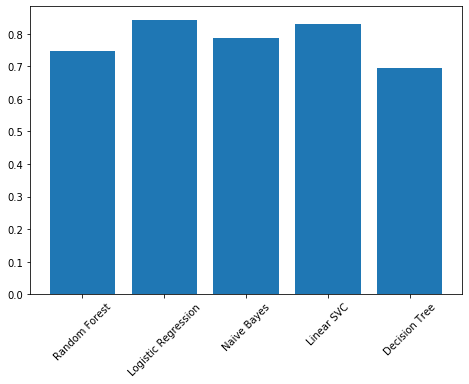

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [x,y,z,a,b]
sy.bar(langs,models)
plt.show()

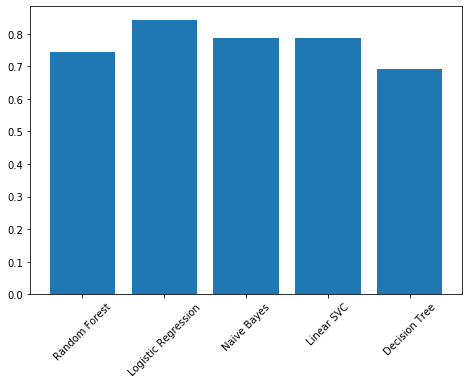

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [x1,y1,z1,a1,b1]
sy.bar(langs,models)
plt.show()

# N-Gram 

In [63]:
#n-gram feature extraction
#Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words = stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_val = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_test, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

    
final_ngram = LogisticRegression()
final_ngram.fit(X, target)
x = accuracy_score(target, final_ngram.predict(X_val))
x1 = f1_score(target, final_ngram.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(X_val)))
print ('F1 score:', f1_score(target, final_ngram.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_ngram.predict(X_val)))



/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final Accuracy: 0.9
F1 score: 0.89999820220768

 Confusion Matrix:
 [[11197  1303]
 [ 1197 11303]]


In [64]:
#Random Forest Classifier

final_ngram = RandomForestClassifier(n_estimators = 10)
final_ngram.fit(X, target)
y = accuracy_score(target, final_ngram.predict(X_val))
y1 = f1_score(target, final_ngram.predict(X_val), average='weighted')

print ("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(X_val)))
print ('F1 score:', f1_score(target, final_ngram.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_ngram.predict(X_val)))



Final Accuracy: 0.74924
F1 score: 0.7480956590360426

 Confusion Matrix:
 [[10208  2292]
 [ 3977  8523]]


In [65]:
#Naive Bayes Classifier

    
final_ngram = MultinomialNB()
final_ngram.fit(X, target)
z = accuracy_score(target, final_ngram.predict(X_val))
z1 = f1_score(target, final_ngram.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(X_val)))
print ('F1 score:', f1_score(target, final_ngram.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_ngram.predict(X_val)))



Final Accuracy: 0.86848
F1 score: 0.8682049883045876

 Confusion Matrix:
 [[11427  1073]
 [ 2215 10285]]


In [66]:
#Linear SVC
    
final = LinearSVC()
final.fit(X, target)
a = accuracy_score(target, final_ngram.predict(X_val))
a1 = f1_score(target, final_ngram.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final.predict(X_val)))
print ('F1 score:', f1_score(target, final_ngram.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_ngram.predict(X_val)))




/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Final Accuracy: 0.89408
F1 score: 0.8682049883045876

 Confusion Matrix:
 [[11427  1073]
 [ 2215 10285]]


In [67]:
#Decision Tree Classifier
    
final_ngram = DecisionTreeClassifier()
final_ngram.fit(X, target)
b = accuracy_score(target, final_ngram.predict(X_val))
b1 = f1_score(target, final_ngram.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(X_val)))
print ('F1 score:', f1_score(target, final_ngram.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_ngram.predict(X_val)))



Final Accuracy: 0.72284
F1 score: 0.7228387543264975

 Confusion Matrix:
 [[9062 3438]
 [3491 9009]]


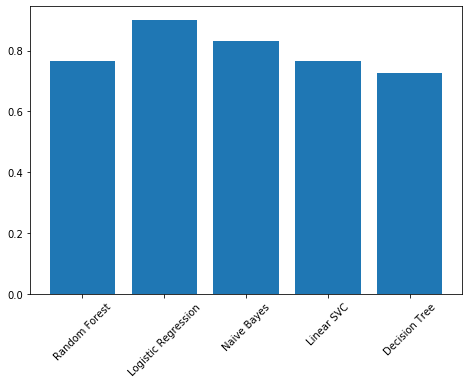

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [y,x,z,a,b]
sy.bar(langs,models)
plt.show()

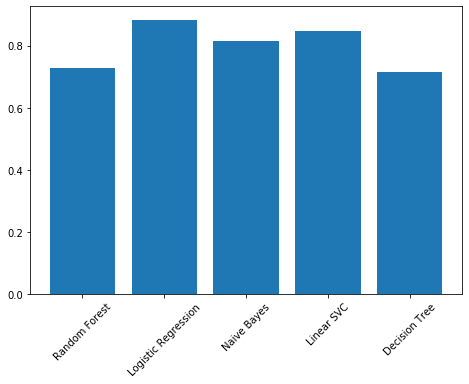

In [77]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [y1,x1,z1,a1,b1]
sy.bar(langs,models)
plt.show()

# Word Counts

In [69]:
#Logistic Regression

wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(reviews_train_clean)
X = wc_vectorizer.transform(reviews_train_clean)
X_val = wc_vectorizer.transform(reviews_test_clean)

X_train, X_test, y_train, y_val = train_test_split(
    X, target, train_size = 0.75, 
)

final_wc = LogisticRegression()
final_wc.fit(X, target)
x = accuracy_score(target, final_wc.predict(X_val))
x1 = f1_score(target, final_wc.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_wc.predict(X_val)))
print ('F1 score:', f1_score(target, final_wc.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_wc.predict(X_val)))


/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final Accuracy: 0.86752
F1 score: 0.8675110043151665

 Confusion Matrix:
 [[10947  1553]
 [ 1759 10741]]


In [70]:
#Random Forest Classifier

final_wc = RandomForestClassifier(n_estimators = 10)
final_wc.fit(X, target)
y = accuracy_score(target, final_wc.predict(X_val))
y1 = f1_score(target, final_wc.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_wc.predict(X_val)))
print ('F1 score:', f1_score(target, final_wc.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_wc.predict(X_val)))


Final Accuracy: 0.74632
F1 score: 0.7450506803549727

 Confusion Matrix:
 [[10211  2289]
 [ 4053  8447]]


In [71]:
#Naive Bayes Classifier
    
final_wc = MultinomialNB()
final_wc.fit(X, target)
z = accuracy_score(target, final_wc.predict(X_val))
z1 = f1_score(target, final_wc.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_wc.predict(X_val)))
print ('F1 score:', f1_score(target, final_wc.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_wc.predict(X_val)))


Final Accuracy: 0.81512
F1 score: 0.8143538797494231

 Confusion Matrix:
 [[10992  1508]
 [ 3114  9386]]


In [72]:
#Linear SVC
    
final_wc = LinearSVC()
final_wc.fit(X, target)
a = accuracy_score(target, final_wc.predict(X_val))
a1 = f1_score(target, final_wc.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_wc.predict(X_val)))
print ('F1 score:', f1_score(target, final_wc.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_wc.predict(X_val)))


Final Accuracy: 0.84596
F1 score: 0.8459424278235793

 Confusion Matrix:
 [[10708  1792]
 [ 2059 10441]]


/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
#Decision Tree Classifier

final_wc = DecisionTreeClassifier()
final_wc.fit(X, target)
b = accuracy_score(target, final_wc.predict(X_val))
b1 = f1_score(target, final_wc.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_wc.predict(X_val)))
print ('F1 score:', f1_score(target, final_wc.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_wc.predict(X_val)))


Final Accuracy: 0.71344
F1 score: 0.7134340412620803

 Confusion Matrix:
 [[8975 3525]
 [3639 8861]]


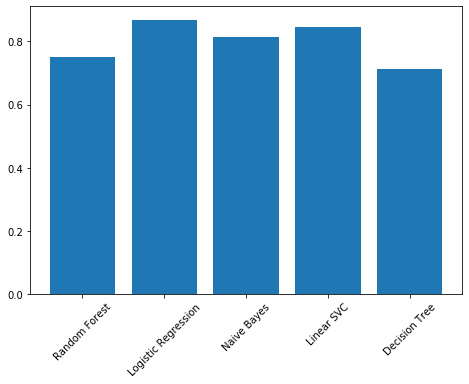

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [y,x,z,a,b]
sy.bar(langs,models)
plt.show()

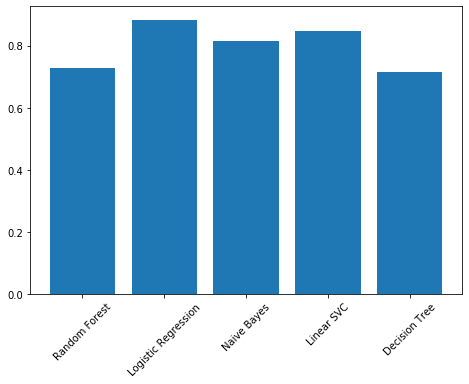

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [y1,x1,z1,a1,b1]
sy.bar(langs,models)
plt.show()

# TF-IDF

In [79]:
#Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(reviews_train_clean)
X = tfidf_vectorizer.transform(reviews_train_clean)
X_val = tfidf_vectorizer.transform(reviews_test_clean)

X_train, X_test, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

    
final_tfidf = LogisticRegression()
final_tfidf.fit(X, target)
x = accuracy_score(target, final_tfidf.predict(X_val))
x1 = f1_score(target, final_tfidf.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(X_val)))
print ('F1 score:', f1_score(target, final_tfidf.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_tfidf.predict(X_val)))


/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final Accuracy: 0.882
F1 score: 0.88199966695586

 Confusion Matrix:
 [[11046  1454]
 [ 1496 11004]]


In [80]:
#Random Forest Classifier
    
final_tfidf = RandomForestClassifier(n_estimators = 10)
final_tfidf.fit(X, target)
y = accuracy_score(target, final_tfidf.predict(X_val))
y1 = f1_score(target, final_tfidf.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(X_val)))
print ('F1 score:', f1_score(target, final_tfidf.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_tfidf.predict(X_val)))


Final Accuracy: 0.73568
F1 score: 0.734144418159288

 Confusion Matrix:
 [[10146  2354]
 [ 4254  8246]]


In [81]:
#Naive Bayes Classifier

final_tfidf = MultinomialNB()
final_tfidf.fit(X, target)
z = accuracy_score(target, final_tfidf.predict(X_val))
z1 = f1_score(target, final_tfidf.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(X_val)))
print ('F1 score:', f1_score(target, final_tfidf.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_tfidf.predict(X_val)))


Final Accuracy: 0.83024
F1 score: 0.8295866203788163

 Confusion Matrix:
 [[11152  1348]
 [ 2896  9604]]


In [82]:
#Linear SVC

    
final_tfidf = LinearSVC()
final_tfidf.fit(X, target)
a = accuracy_score(target, final_tfidf.predict(X_val))
a1 = f1_score(target, final_tfidf.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(X_val)))
print ('F1 score:', f1_score(target, final_tfidf.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_tfidf.predict(X_val)))


Final Accuracy: 0.87704
F1 score: 0.8770245739625577

 Confusion Matrix:
 [[11103  1397]
 [ 1677 10823]]


In [83]:
#Decision Tree Classifier
    
final_tfidf = DecisionTreeClassifier(criterion = "entropy")
final_tfidf.fit(X, target)
b = accuracy_score(target, final_tfidf.predict(X_val))
b1 = f1_score(target, final_tfidf.predict(X_val), average='weighted')
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(X_val)))
print ('F1 score:', f1_score(target, final_tfidf.predict(X_val),
                            average='weighted'))
print ('\n Confusion Matrix:\n',confusion_matrix(target,final_tfidf.predict(X_val)))


Final Accuracy: 0.70604
F1 score: 0.7060393561086057

 Confusion Matrix:
 [[8844 3656]
 [3693 8807]]


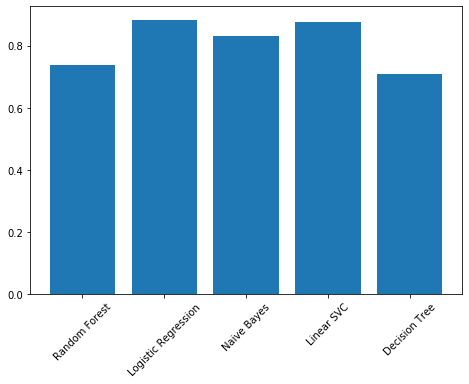

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [y,x,z,a,b]
sy.bar(langs,models)
plt.show()

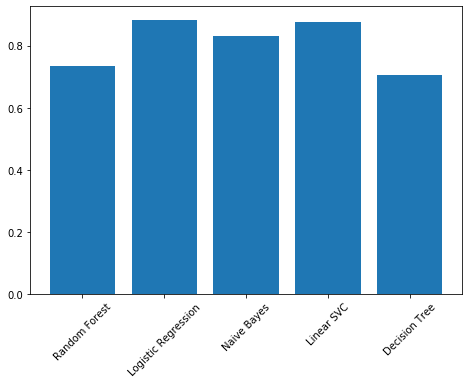

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure()
sy = fig.add_axes([0,0,1,1])
langs = ['Random Forest', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree']
plt.xticks(rotation=45)
models = [y1,x1,z1,a1,b1]
sy.bar(langs,models)
plt.show()

# Toxic Comment Classification

In [31]:
import re
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
#defining regular expression for preprocessing
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")


In [33]:
#function to load the train and test data sets
def load():
	reviews_train = []
	for line in open('/Users/navyasogi/Desktop/ML_Coursework/ProjectSubmission_2_Group10/movie_data/full_train.txt', 'r', encoding = "utf8"):
		reviews_train.append(line.strip())

	reviews_test = []
	for line in open('/Users/navyasogi/Desktop/ML_Coursework/ProjectSubmission_2_Group10/movie_data/full_test.txt', 'r', encoding = "utf8"):
	    reviews_test.append(line.strip())

	return(reviews_train,reviews_test)

In [34]:
#function to clean up the cluttered review set
def preprocess_reviews(reviews):
	reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
	reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
	return reviews

In [35]:
#function to give example of some posetive and negative tokens
def token_example(feature_to_coef):
	print("Example of some positive words and their weightage:")
	for best_positive in sorted(
	    feature_to_coef.items(), 
	    key=lambda x: x[1], 
	    reverse=True)[:5]:
	    print (best_positive)
    
	print("Example of some negative words and their weightage")
	for best_negative in sorted(
	    feature_to_coef.items(), 
	    key=lambda x: x[1])[:5]:
	    print (best_negative)

def Regularisation_parameter(X_train, y_train, y_val, X_val):
	z = 0
	for c in [0.01, 0.05, 0.25, 0.5, 1]:
	    lr = LogisticRegression(C=c)
	    lr.fit(X_train, y_train)
	    print ("Accuracy for C=%s: %s" 
	           % (c, accuracy_score(y_val, lr.predict(X_val))))
	    if(z < accuracy_score(y_val, lr.predict(X_val))):
	    	z = accuracy_score(y_val, lr.predict(X_val))
	
	return z


In [37]:
#function to test human generated review for cross validation
def test_new_review(final_model,cv):
	pred = final_model.predict(cv.transform([input("Check Your Own Review :")]))[0]
	if(pred == 0):
		print("Negative Review!")
	else:
		print("Positive Review!")

	while True:
		a = input("Enter yes/no to continue :")
		if a=="yes":
			test_new_review(final_model,cv)
			continue
		elif a=="no":
			sys.exit()

In [38]:
def main():
	#loading the train and test data sets
	reviews_train,reviews_test = load()

	#preprocessing the given data
	reviews_train_clean = preprocess_reviews(reviews_train)
	reviews_test_clean = preprocess_reviews(reviews_test)


	#vectorization of the reviews
	cv = CountVectorizer(binary=True)
	cv.fit(reviews_train_clean) 
	X = cv.transform(reviews_train_clean) # will give a sparse matrix find a way to make this efficient
	X_test = cv.transform(reviews_test_clean)
	target = [1 if i < 12500 else 0 for i in range(25000)]


	#splitting the train and test data
	X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.75)

	#choosing the regularisaton parameter (logistic regression) for the greatest accuracy value
	best_c_value = Regularisation_parameter(X_train, y_train, y_val, X_val)

	#training the final logistic model for the best accuracy
	final_model = LogisticRegression(C=best_c_value)
	final_model.fit(X, target)
	print ("Final Accuracy: %s" 
	       % accuracy_score(target, final_model.predict(X_test)))

	feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
	}

    #example of pos and neg sentiment
	token_example(feature_to_coef) 
	
	while(True):
		test_new_review(final_model,cv) #checking the model with human data

if __name__ == '__main__':
	main()

/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.87472
Accuracy for C=0.05: 0.88384
Accuracy for C=0.25: 0.8824
Accuracy for C=0.5: 0.8816
Accuracy for C=1: 0.87968
Final Accuracy: 0.86988
Example of some positive words and their weightage:
('excellent', 1.531708643643919)
('refreshing', 1.47936220638)
('perfect', 1.3522579508993777)
('appreciated', 1.342899395244599)
('superb', 1.3068109279589009)
Example of some negative words and their weightage
('worst', -2.299235733164476)
('waste', -2.1373496043654225)
('disappointment', -1.9421522165706508)
('poorly', -1.9183538109954732)
('awful', -1.7211988997830716)
Check Your Own Review :It was an amazing movie 
Positive Review!
Enter yes/no to continue :yes
Check Your Own Review :It was a very bad movie
Negative Review!
Enter yes/no to continue :no


SystemExit: 

/Users/navyasogi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
